## Day 26: Retail Data Processing and Analysis – Part 2 

You will continue to analyze the retail_shop_data CSV file. You will use Matplotlib to create some 
visualizations. 

1. Using pandas, write code to check the difference in profit 
between jackets and sneakers. Return the absolute value of the 
profit. 

In [5]:
import pandas as pd

df = pd.read_csv("retail_shop_data_reprocessed.csv")
df.head(21)

,Date,Customer ID,Product ID,Product Name,Cost Per Product,Price Per Product,Quantity,Revenue,Costs,Profit,Filter
0,1 01 2023,1001,101,T-Shirt,18,20,2,40,36,4,False
1,1 01 2023,1002,102,Jeans,35,50,1,50,35,15,False
2,2 01 2023,1003,103,Hoodie,25,30,3,90,75,15,False
3,3 01 2023,1004,104,Sneakers,55,70,2,140,110,30,True
4,3 01 2023,1005,105,Sunglasses,17,25,1,25,17,8,False
5,4 01 2023,1006,106,Backpack,40,45,2,90,80,10,False
6,5 01 2023,1007,107,Watch,50,60,1,60,50,10,False
7,6 01 2023,1008,108,Jacket,63,80,1,80,63,17,True
8,6 01 2023,1009,109,Scarf,8,15,2,30,16,14,False
9,7 01 2023,1010,110,Gloves,5,10,3,30,15,15,False


In [6]:
# Group data by products and sum profit
df_diff = df.groupby("Product Name")["Profit"].sum()

jackets_sneakers_profit = abs(df_diff.loc["Jacket"] - df_diff.loc["Sneakers"])
print(f"The profit difference between Jackets and Sneakers {jackets_sneakers_profit}")

The profit difference between Jackets and Sneakers 21


2. Using pandas, what is the difference in costs between the 
most profitable product and the least profitable product. 

In [7]:
# Sort DataFrame by profit
df.sort_values("Profit", inplace=True)

cost_diff = df.iloc[-1]["Costs"] - df.iloc[0]["Costs"]

print("The difference in costs between the most profitable",
      "product and least profitable is", cost_diff)



The difference in costs between the most profitable product and least profitable is 98


3. Write code to access the total costs of jackets (using the 
.loc attribute). 

In [9]:
# Group data by Product Name and sum costs
df_data = df.groupby("Product Name")["Costs"].sum()

# Use loc to find the product costs
df_costs_of_jackets = df_data.loc["Jacket"]

print("The costs of Jackets is", df_costs_of_jackets)


The costs of Jackets is 189


4. Using Matplotlib, create a bar stack plot of the sales, costs, 
and profits of the 6 least profitable products. The bar plot 
should be sorted by profit in ascending order. 

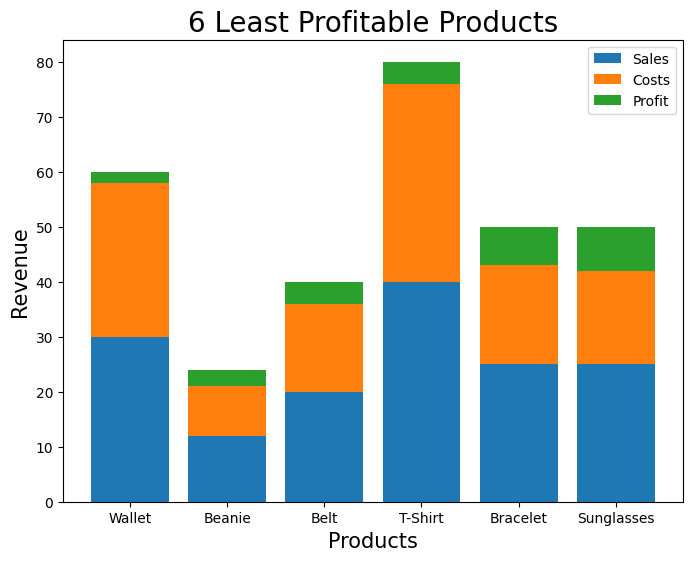

In [10]:
import matplotlib.pyplot as plt

df_least_6_products = df.sort_values(by = "Profit", ascending=True)[0:6]

# Create data 
products = df_least_6_products["Product Name"]
sales = df_least_6_products["Revenue"]
costs = df_least_6_products["Costs"]
profit = df_least_6_products["Profit"]

# Create figure and axes 
fig, ax = plt.subplots(figsize=(8, 6))

# Potting the data 
ax.bar(products, sales, label="Sales")
ax.bar(products, costs, label="Costs", bottom = sales)
ax.bar(products, profit, label="Profit", bottom = sales + costs)

ax.set_ylabel("Revenue", fontsize = 15)
ax.set_xlabel("Products", fontsize = 15)
plt.xticks(rotation = 0)
ax.legend()
plt.title("6 Least Profitable Products", fontsize = 20)
plt.show()
